In [241]:
import numpy as np
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset


Let's start with oking at individual file and see what they have 

In [9]:
#poro 3 D map pf porosity for eralisation of XXXX 
#input 
sim100 = np.load('./origen_interview_data/PORO/sim100_poro.npy')#.reshape(15,25,24)

In [10]:
sim100.shape

(9000,)

In [6]:
#output
simout = np.load('./origen_interview_data/WOPR/sim100_wopr.npy')

In [8]:
simout.shape # 300 days and 7 wells

(300, 7)

In [15]:
sim_permx = np.load('./origen_interview_data/PERMX/sim100_permx.npy').reshape(15,25,24)

In [16]:
sim_permx.shape

(15, 25, 24)

In [ ]:
sim_permy = np.load('./origen_interview_data/PERMY/sim100_permy.npy').reshape(15,25,24)
sim_permy

In [ ]:
sim_permx

In [21]:
are_equal = np.array_equal(sim_permx, sim_permy)

# Print the result
if are_equal:
    print("The arrays are the same.")
else:
    print("The arrays are different.")

The arrays are the same.


In [79]:
sim_poro = np.load('./origen_interview_data/PORO/sim100_poro.npy')

In [80]:
sim_poro.shape

(9000,)

In [ ]:
sim_permz = np.load('./origen_interview_data/PERMZ/sim100_permz.npy').reshape(15,25,24)
sim_permz

In [24]:
xz = sim_permz[:,:,2]

In [26]:
xz.shape

(15, 25)

In [33]:
sim_transz = np.load('./origen_interview_data/TRANZ/sim100_tranz.npy')#.reshape(15,25,24)
sim_transz.shape

(9000,)

In [32]:
sim_transx = np.load('./origen_interview_data/TRANX/sim100_tranx.npy').reshape(15,25,24)
sim_transx

array([[[5.13003618e-02, 3.64290737e-02, 2.89253909e-02, ...,
         1.39665756e+01, 1.22723608e+01, 0.00000000e+00],
        [6.70089871e-02, 4.91433181e-02, 3.41623612e-02, ...,
         1.58494005e+01, 1.39668264e+01, 0.00000000e+00],
        [9.56059843e-02, 1.59102932e-01, 3.42614059e+01, ...,
         1.96134262e+01, 1.90544167e+01, 0.00000000e+00],
        ...,
        [4.08277702e+01, 4.25645409e+01, 4.50171089e+01, ...,
         4.71130981e+01, 3.50002136e+01, 0.00000000e+00],
        [4.63860207e+01, 5.25192604e+01, 5.65474701e+01, ...,
         5.11638069e+01, 3.99729385e+01, 0.00000000e+00],
        [6.30477791e+01, 7.27278748e+01, 8.11408691e+01, ...,
         4.88655014e+01, 4.10560837e+01, 0.00000000e+00]],

       [[1.09977880e-02, 1.14922840e-02, 1.37631157e-02, ...,
         4.35564900e-03, 2.38650432e-03, 0.00000000e+00],
        [1.96573455e-02, 1.80177279e-02, 1.81060024e-02, ...,
         6.11833343e-03, 3.55802220e-03, 0.00000000e+00],
        [3.12348232e-02, 

In [30]:
are_equal = np.array_equal(sim_transz, sim_transx)

# Print the result
if are_equal:
    print("The arrays are the same.")
else:
    print("The arrays are different.")

The arrays are different.


In [53]:
#looking at depth
sim_depth = np.load('./origen_interview_data/DEPTH/sim100_depth.npy').reshape(15,25,24)

In [45]:
#looking at depth
sim_porv = np.load('./origen_interview_data/PORV/sim100_porv.npy').reshape(15,25,24)

In [39]:
#sim_depth

In [46]:
sim_porv

array([[[ 23388.592,  21446.756,  19703.047, ...,  92084.445,
          89295.28 ,  86335.24 ],
        [ 24953.09 ,  22961.24 ,  21336.793, ...,  95149.64 ,
          92071.945,  89306.82 ],
        [ 27560.158,  24912.695, 116154.3  , ...,  99869.1  ,
          97532.3  ,  98387.96 ],
        ...,
        [117898.01 , 119145.76 , 120378.766, ..., 127051.28 ,
         119233.28 , 109806.87 ],
        [120185.445, 124738.836, 127781.914, ..., 128901.43 ,
         122313.87 , 114163.09 ],
        [130153.664, 134230.66 , 139893.94 , ..., 126961.836,
         121281.875, 116333.516]],

       [[ 12324.743,  12151.143,  12613.759, ...,  10821.721,
           9001.068,   7884.441],
        [ 14373.097,  13940.295,  13750.344, ...,  11908.052,
           9750.536,   8821.696],
        [ 16163.452,  15628.942,  15367.578, ...,  12232.413,
          10954.687,  10271.341],
        ...,
        [ 15639.522,  16177.639,  17505.137, ...,  17377.701,
          15910.984,  14844.851],
        [ 16

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the porosity data
poro_data = sim_porv

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create a meshgrid for x, y, and z coordinates
x, y, z = np.meshgrid(range(15), range(25), range(24), indexing='ij')

# Plot the 3D surface plot for porosity
surface = ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=plt.cm.viridis(poro_data), shade=False)

# Add color bar
cbar = fig.colorbar(surface, ax=ax, shrink=0.8, aspect=10)
cbar.set_label('Porosity')

# Set labels
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('3D Map of Porosity')

# Show the plot
plt.show()


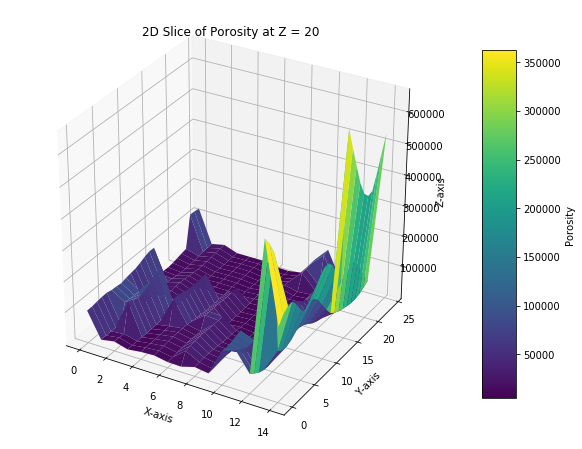

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the porosity data
#poro_data = np.load("simXXX_poro.npy").reshape(15, 25, 24)

# Choose a constant value along the Z-axis
z_slice = 20  # You can choose any slice you prefer
z_data = poro_data[:, :, z_slice]

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create a meshgrid for x and y coordinates
x, y = np.meshgrid(range(15), range(25), indexing='ij')

# Plot the 3D surface plot for porosity
surface = ax.plot_surface(x, y, z_data, rstride=1, cstride=1, cmap=plt.cm.viridis, shade=False)

# Add color bar
cbar = fig.colorbar(surface, ax=ax, shrink=0.8, aspect=10)
cbar.set_label('Porosity')

# Set labels
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('2D Slice of Porosity at Z = {}'.format(z_slice))

# Show the plot
plt.show()


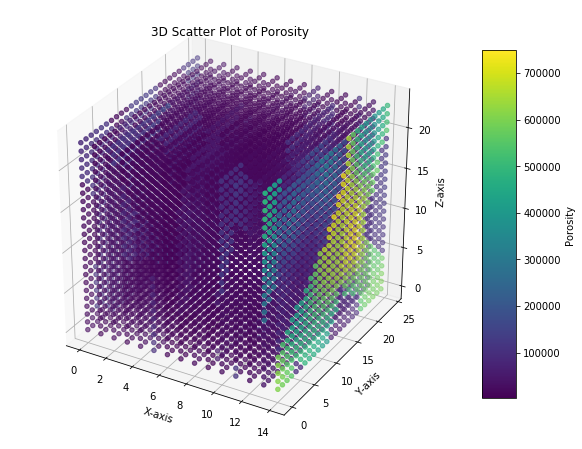

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the porosity data
#poro_data = np.load("simXXX_poro.npy").reshape(15, 25, 24)

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create a meshgrid for x, y, and z coordinates
x, y, z = np.meshgrid(range(15), range(25), range(24), indexing='ij')

# Flatten the arrays for 3D scatter plot
x_flat = x.flatten()
y_flat = y.flatten()
z_flat = z.flatten()
poro_flat = poro_data.flatten()

# Plot the 3D scatter plot for porosity
scatter = ax.scatter(x_flat, y_flat, z_flat, c=poro_flat, cmap=plt.cm.viridis)

# Add color bar
cbar = fig.colorbar(scatter, ax=ax, shrink=0.8, aspect=10)
cbar.set_label('Porosity')

# Set labels
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('3D Scatter Plot of Porosity')

# Show the plot
plt.show()


In [57]:
#output 
sim_wopr = np.load('./origen_interview_data/WOPR/sim200_wopr.npy')

In [59]:
sim_wopr.shape #timestep = 300 days and number of well = 7

(300, 7)

In [ ]:
sim_wopr

In [60]:
sim_bhps = np.load('./origen_interview_data/BHP/sim100_bhps.npy')

In [61]:
sim_bhps.shape

(300, 7)

In [77]:
sim_bhps.shape

(300, 7)

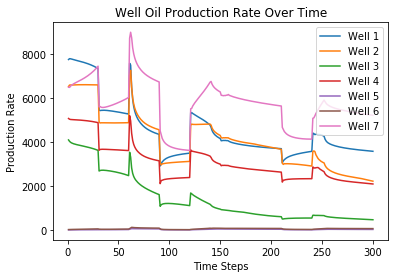

In [78]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming sim_wopr has shape (300, 7)
sim_wopr = np.load('./origen_interview_data/WOPR/sim200_wopr.npy')

# Number of wells
num_wells = sim_wopr.shape[1]

# Time steps
time_steps = np.arange(1, 301)

# Plot production for each well
for well in range(num_wells):
    plt.plot(time_steps, sim_wopr[:, well], label=f'Well {well+1}')

plt.title('Well Oil Production Rate Over Time')
plt.xlabel('Time Steps')
plt.ylabel('Production Rate')
plt.legend()
plt.show()


In [4]:
import numpy as np
import os

# Number of files for each feature
num_files = 40

# List to store data for each feature
features_data = []

# Feature directories
feature_directories = ['/home/rhythm/Research/ml/origen/origen_interview_data/PERMX/',
                       '/home/rhythm/Research/ml/origen/origen_interview_data/PERMY/',
                       '/home/rhythm/Research/ml/origen/origen_interview_data/PERMZ/'
,'/home/rhythm/Research/ml/origen/origen_interview_data/DEPTH'
,'/home/rhythm/Research/ml/origen/origen_interview_data/PORO'
,'/home/rhythm/Research/ml/origen/origen_interview_data/PORV'
,'/home/rhythm/Research/ml/origen/origen_interview_data/SATNUM'
,'/home/rhythm/Research/ml/origen/origen_interview_data/TRANX'
,'/home/rhythm/Research/ml/origen/origen_interview_data/TRANY'
,'/home/rhythm/Research/ml/origen/origen_interview_data/TRANZ']

# Loop over each feature directory
for feature_idx, feature_directory in enumerate(feature_directories):
    # Initialize an array to store the data for one feature
    feature_data = []

    # Loop over each file in the feature directory
    for file_idx in range(1, num_files + 1):
        file_path = os.path.join(feature_directory, f'sim{file_idx}_{["permx", "permy", "permz","depth", "poro", "porv", "satnum", "tranx", "trany", "tranz" ][feature_idx]}.npy')

        # Check if the file exists
        if os.path.exists(file_path):
            # Load the data and append it to the feature_data
            data = np.load(file_path).reshape(15, 25, 24)
            feature_data.append(data)
        else:
            print(f"File not found: {file_path}")

    # Convert the feature_data to a NumPy array
    feature_data = np.array(feature_data)
    
    # Append the feature_data to the list of features_data
    features_data.append(feature_data)

    # Display the shape of the loaded data
    print(f"Shape of loaded data for feature {feature_idx + 1}: {feature_data.shape}")

# Convert the list of features_data to a NumPy array
features_data = np.array(features_data)


Shape of loaded data for feature 1: (40, 15, 25, 24)
Shape of loaded data for feature 2: (40, 15, 25, 24)
Shape of loaded data for feature 3: (40, 15, 25, 24)
Shape of loaded data for feature 4: (40, 15, 25, 24)
Shape of loaded data for feature 5: (40, 15, 25, 24)
Shape of loaded data for feature 6: (40, 15, 25, 24)
Shape of loaded data for feature 7: (40, 15, 25, 24)
Shape of loaded data for feature 8: (40, 15, 25, 24)
Shape of loaded data for feature 9: (40, 15, 25, 24)
Shape of loaded data for feature 10: (40, 15, 25, 24)


In [5]:
# Combine the list of features_data into one array
combined_data = np.stack(features_data, axis=0)

# Display the shape of the combined data
print(f"Shape of combined data: {combined_data.shape}")
#nFeature, nFile, nX, nY, nZ

Shape of combined data: (10, 40, 15, 25, 24)


In [106]:
combined_data.dtype

dtype('float32')

In [259]:
import numpy as np
import os

# Number of files for each feature
num_files = 40

# List to store data for each feature
temporal_features_data = []

# Feature directories
feature_directories = ['/home/rhythm/Research/ml/origen/origen_interview_data/BHP/']

# Loop over each feature directory
for feature_idx, feature_directory in enumerate(feature_directories):
    # Initialize an array to store the data for one feature
    temporal_data = []

    # Loop over each file in the feature directory
    for file_idx in range(1, num_files + 1):
        file_path = os.path.join(feature_directory, f'sim{file_idx}_bhps.npy')
      #  print(file_idx)
        # Check if the file exists
        if os.path.exists(file_path):
            # Load the data and append it to the temporal_data
            data = np.load(file_path)[:,0]
            temporal_data.append(data)
        else:
            print(f"File not found: {file_path}")

    # Convert the temporal_data to a NumPy array
    temporal_data = np.array(temporal_data)
    
    # Append the temporal_data to the list of temporal_features_data
    temporal_features_data.append(temporal_data)

    # Display the shape of the loaded data
    print(f"Shape of loaded data for feature {feature_idx + 1}: {temporal_data.shape}")

# Convert the list of temporal_features_data to a NumPy array
temporal_features_data = np.array(temporal_features_data)
print(temporal_features_data.shape)

Shape of loaded data for feature 1: (40, 300)
(1, 40, 300)


In [179]:
temporal_tensor = torch.tensor(temporal_data, dtype=torch.float32)


In [180]:
temporal_tensor.shape

torch.Size([40, 300])

In [193]:
import numpy as np
import os

# Number of files for each feature
num_files = 40

# List to store data for each feature
temporal_features_data = []

# Feature directories
feature_directories = ['/home/rhythm/Research/ml/origen/origen_interview_data/BHP/']

# Loop over each feature directory
for feature_idx, feature_directory in enumerate(feature_directories):
    # Initialize an array to store the data for one feature
    temporal_data = []

    # Loop over each file in the feature directory
    for file_idx in range(1, num_files + 1):
        file_path = os.path.join(feature_directory, f'sim{file_idx}_bhps.npy')
        # Check if the file exists
        if os.path.exists(file_path):
            # Load the data and append pressure for well #1 to the temporal_data
            data = np.load(file_path)[:, 0]
            temporal_data.append(data)
        else:
            print(f"File not found: {file_path}")

    # Convert the temporal_data to a NumPy array
    temporal_data = np.array(temporal_data)
    
    # Append the temporal_data to the list of temporal_features_data
    temporal_features_data.append(temporal_data)

    # Display the shape of the loaded data

# Convert the list of temporal_features_data to a NumPy array
temporal_features_data = np.array(temporal_features_data)
#temporal_data = temporal_data.flatten()
print(f"Shape of loaded data for feature {feature_idx + 1}: {temporal_data.shape}")

Shape of loaded data for feature 1: (40, 300)


In [200]:
temporal_data_tensor = torch.tensor(temporal_features_data, dtype=torch.float32)
temporal_data_tensor.shape
temporal_data_tensor = temporal_data_tensor.permute(1,0,2)
temporal_data_tensor.shape

torch.Size([40, 1, 300])

### loading target 

In [292]:
import numpy as np
import os

# Number of files for each feature
num_files = 40

# List to store data for each feature
target_features_data = []

# Feature directories
feature_directories = ['/home/rhythm/Research/ml/origen/origen_interview_data/WOPR/']

# Loop over each feature directory
for feature_idx, feature_directory in enumerate(feature_directories):
    # Initialize an array to store the data for one feature
    target_data = []

    # Loop over each file in the feature directory
    for file_idx in range(1, num_files + 1):
        file_path = os.path.join(feature_directory, f'sim{file_idx}_wopr.npy')
        # Check if the file exists
        if os.path.exists(file_path):
            # Load the data and append pressure for well #1 to the temporal_data
            data = np.load(file_path)[:, 0]
            target_data.append(data)
        else:
            print(f"File not found: {file_path}")

    # Convert the temporal_data to a NumPy array
    target_data = np.array(target_data)
    
    # Append the temporal_data to the list of temporal_features_data
    target_features_data.append(target_data)

    # Display the shape of the loaded data

# Convert the list of temporal_features_data to a NumPy array
target_features_data = np.array(target_features_data)
#temporal_data = temporal_data.flatten()
print(f"Shape of loaded target for feature {feature_idx + 1}: {target_data.shape}")

Shape of loaded target for feature 1: (40, 300)


In [295]:
traget_flattened = target_data.flatten()
traget_flattened.shape

(12000,)

In [300]:
target_tensor_flattened = torch.tensor(traget_flattened, dtype = torch.float32)
target_tensor_flattened.shape

torch.Size([12000])

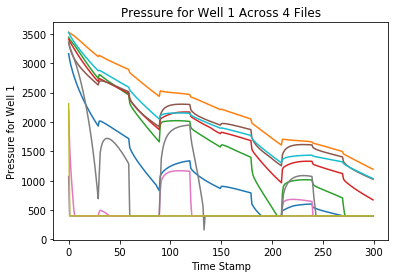

In [98]:
import numpy as np
import os
import matplotlib.pyplot as plt

# Number of files for each feature
num_files = 10

# Feature directories
feature_directories = ['/home/rhythm/Research/ml/origen/origen_interview_data/BHP/']

# Loop over each feature directory
for feature_idx, feature_directory in enumerate(feature_directories):
    # Initialize an array to store the data for well 1
    well1_data = []

    # Loop over each file in the feature directory
    for file_idx in range(1, num_files + 1):
        file_path = os.path.join(feature_directory, f'sim{file_idx}_bhps.npy')
        # Check if the file exists
        if os.path.exists(file_path):
            # Load the data and append pressure for well #1 to the well1_data
            data = np.load(file_path)[:, 0]
            plt.plot(np.arange(0, 300), data)  # Plot each well's pressure as a separate line

# Add labels and title
plt.xlabel('Time Stamp')
plt.ylabel('Pressure for Well 1')
plt.title('Pressure for Well 1 Across 4 Files')
plt.show()


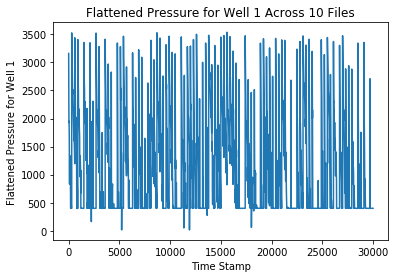

In [100]:
import numpy as np
import os
import matplotlib.pyplot as plt

# Number of files for each feature
num_files = 100

# Feature directories
feature_directories = ['/home/rhythm/Research/ml/origen/origen_interview_data/BHP/']

# Initialize an array to store the flattened data for well 1
well1_flattened_data = []

# Loop over each feature directory
for feature_idx, feature_directory in enumerate(feature_directories):
    # Loop over each file in the feature directory
    for file_idx in range(1, num_files + 1):
        file_path = os.path.join(feature_directory, f'sim{file_idx}_bhps.npy')
        # Check if the file exists
        if os.path.exists(file_path):
            # Load the data and flatten pressure for well #1
            data = np.load(file_path)[:, 0]
            well1_flattened_data.extend(data)

# Convert the list to a NumPy array
well1_flattened_data = np.array(well1_flattened_data)

# Plot the flattened data
plt.plot(np.arange(0, len(well1_flattened_data)), well1_flattened_data)

# Add labels and title
plt.xlabel('Time Stamp')
plt.ylabel('Flattened Pressure for Well 1')
plt.title('Flattened Pressure for Well 1 Across 10 Files')
plt.show()


In [90]:
temporal_data =temporal_data.flatten()
temporal_data.shape

(12000,)

## temporal data for all wells

In [270]:
import numpy as np
import os

# Number of files for each feature
num_files = 40

# List to store data for each feature
temporal_features_data = []

# Feature directories
feature_directories = ['/home/rhythm/Research/ml/origen/origen_interview_data/BHP/']

# Loop over each feature directory
for feature_idx, feature_directory in enumerate(feature_directories):
    # Initialize an array to store the data for one feature
    temporal_data = []

    # Loop over each file in the feature directory
    for file_idx in range(1, num_files + 1):
        file_path = os.path.join(feature_directory, f'sim{file_idx}_bhps.npy')
        # Check if the file exists
        if os.path.exists(file_path):
            # Load the data and append pressure for well #1 to the temporal_data
            data = np.load(file_path)
            temporal_data.append(data)
        else:
            print(f"File not found: {file_path}")

    # Convert the temporal_data to a NumPy array
    temporal_data = np.array(temporal_data)
    
    # Append the temporal_data to the list of temporal_features_data
    temporal_features_data.append(temporal_data)

    # Display the shape of the loaded data

# Convert the list of temporal_features_data to a NumPy array
temporal_features_data = np.array(temporal_features_data)
#temporal_data = temporal_data.flatten()
print(f"Shape of loaded data for feature {feature_idx + 1}: {temporal_data.shape}")

Shape of loaded data for feature 1: (40, 300, 7)


In [272]:
temporal_data_tensor = torch.tensor(temporal_data, dtype=torch.float32)
temporal_data_tensor.shape
temporal_data_tensor =temporal_data_tensor.permute(0,2,1)
temporal_data_tensor.shape


torch.Size([40, 7, 300])

In [262]:
import torch 
# Convert NumPy arrays to PyTorch tensors
combined_data_tensor = torch.tensor(temporal_features_data, dtype=torch.float32)
temporal_features_data_tensor = torch.tensor(temporal_features_data, dtype=torch.float32)


In [264]:
temporal_features_data_tensor = temporal_features_data_tensor.permute(0,1,3,2)
temporal_features_data_tensor.shape

torch.Size([1, 40, 7, 300])

# 3d CNN to capture the spatial

In [215]:
import torch
import torch.nn as nn

class Simple3DCNN(nn.Module):
    def __init__(self):
        super(Simple3DCNN, self).__init__()

        # 3D Convolutional layer
        self.conv3d_layer = nn.Conv3d(in_channels=10, out_channels=6, kernel_size=(3,3,3), padding=(1, 1, 1))
        
        # Activation function (ReLU)
        self.relu = nn.ReLU()

        # MaxPooling layer
        self.maxpool3d_layer = nn.MaxPool3d(kernel_size=(5,5,5), stride=(3,3,3))    
        self.conv3d_layer2 = nn.Conv3d(in_channels=6, out_channels=2, kernel_size=(4,4,4),    padding=0)
      
    def forward(self, x):
        # Input x has shape (batch_size, in_channels, depth, height, width)
        
        # Apply 3D Convolution
        x = self.conv3d_layer(x)
        print(x.shape)
        # Apply ReLU activation
        x = self.relu(x)
        print(x.shape)
        # Apply MaxPooling
        x = self.maxpool3d_layer(x)
        print(x.shape)
         
        # Apply 2nd 1D Convolution
        x = self.conv3d_layer2(x)
        print(x.shape)
        
        # Apply ReLU activation
        x = self.relu(x)
        print(x.shape)
        return x

# Instantiate the model
simple_cnn_model = Simple3DCNN()

# Sample input data (modify according to your data)
#input_data = torch.randn(40, 10, 15, 25, 24)  # Assuming 40 samples, 10 channels, and spatial dimensions

# Forward pass through the model
#output = simple_cnn_model(input_data)

# Display the output shape
#print("Output shape:", output.shape)


In [156]:
simple_cnn_model

Simple3DCNN(
  (conv3d_layer): Conv3d(10, 2, kernel_size=(4, 4, 4), stride=(1, 1, 1), padding=(1, 1, 1))
  (relu): ReLU()
  (maxpool3d_layer): MaxPool3d(kernel_size=(5, 5, 5), stride=(3, 3, 3), padding=0, dilation=1, ceil_mode=False)
)

In [157]:
permuted_tensor.shape

torch.Size([40, 10, 15, 25, 24])

In [216]:
output_cnn = simple_cnn_model(permuted_tensor)


torch.Size([40, 6, 15, 25, 24])
torch.Size([40, 6, 15, 25, 24])
torch.Size([40, 6, 4, 7, 7])
torch.Size([40, 2, 1, 4, 4])
torch.Size([40, 2, 1, 4, 4])


In [218]:
x = output_cnn.view(output_cnn.size(0), -1)
x.shape

torch.Size([40, 32])

In [39]:
temporal_features_data_tensor.shape

torch.Size([1, 40, 300, 7])

In [46]:
# Permute the dimensions
permuted_tensor = combined_data_tensor.permute(1, 0, 2, 3, 4)
permuted_tensor_temporal = temporal_features_data_tensor.permute(0,2,1)


In [71]:
temporal_features_data_tensor.shape

torch.Size([40, 300, 7])

In [47]:
permuted_tensor_temporal.shape

torch.Size([40, 7, 300])

torch.Size([40, 2, 13, 23, 22])
torch.Size([40, 2, 13, 23, 22])
torch.Size([40, 2, 3, 7, 6])


In [78]:
output = output.view(output.size(0), -1)

In [80]:
output.shape

torch.Size([40, 302400])

In [32]:
outputreg = model(permuted_tensor)
#

torch.Size([40, 64, 15, 25, 24])
torch.Size([40, 64, 15, 25, 24])
torch.Size([40, 64, 7, 12, 12])
torch.Size([40, 128, 7, 12, 12])
torch.Size([40, 128, 7, 12, 12])
torch.Size([40, 128, 1, 1, 1])
torch.Size([40, 128])


In [ ]:
outputreg

In [205]:
import torch
import torch.nn as nn

class Simple1DCNN(nn.Module):
    def __init__(self):
        super(Simple1DCNN, self).__init__()

        # 1D Convolutional layer
        self.conv1d_layer = nn.Conv1d(in_channels=1, out_channels=2, kernel_size=3, padding=1)
        
        # Activation function (ReLU)
        self.relu = nn.ReLU()

        # MaxPooling layer
        self.maxpool1d_layer = nn.MaxPool1d(kernel_size=4, stride=1)


    def forward(self, x):
        # Input x has shape (batch_size, 1, sequence_length)
        
        # Apply 1D Convolution
        x = self.conv1d_layer(x)  # Add channel dimension
        print(x.shape)
        
        # Apply ReLU activation
        x = self.relu(x)
        print(x.shape)
        
        # Apply MaxPooling
        x = self.maxpool1d_layer(x)
        print(x.shape)
        
        
        return x

# Instantiate the model
simple_1dcnn_model = Simple1DCNN()

# Sample input data (modify according to your data)
#input_data = torch.randn(40, 300)  # Assuming 40 samples and sequence length of 300
#
## Forward pass through the model
#output = simple_1dcnn_model(input_data)
#
## Display the output shape
#print("Output shape:", output.shape)


In [206]:
simple_1dcnn_model

Simple1DCNN(
  (conv1d_layer): Conv1d(1, 2, kernel_size=(3,), stride=(1,), padding=(1,))
  (relu): ReLU()
  (maxpool1d_layer): MaxPool1d(kernel_size=4, stride=1, padding=0, dilation=1, ceil_mode=False)
)

In [207]:
output_temp = simple_1dcnn_model(temporal_data_tensor)

## Display the output shape
print("Output shape:", output_temp.shape)

torch.Size([40, 2, 300])
torch.Size([40, 2, 300])
torch.Size([40, 2, 297])
Output shape: torch.Size([40, 2, 297])


## 1 D CNN for temporal

In [217]:
import torch
import torch.nn as nn

class Simple1DCNN(nn.Module):
    def __init__(self):
        super(Simple1DCNN, self).__init__()

        # 1st 1D Convolutional layer
        self.conv1d_layer1 = nn.Conv1d(in_channels=1, out_channels=6, kernel_size=3, padding=1)
        
        # Activation function (ReLU)
        self.relu = nn.ReLU()

        # MaxPooling layer
        self.maxpool1d_layer = nn.MaxPool1d(kernel_size=3, stride=1)
        
        # 2nd 1D Convolutional layer
        self.conv1d_layer2 = nn.Conv1d(in_channels=6, out_channels=2, kernel_size=2,stride=1, padding=0)

    def forward(self, x):
        # Input x has shape (batch_size, 1, sequence_length)
        
        # Apply 1st 1D Convolution
        x = self.conv1d_layer1(x)  # Add channel dimension
        print(x.shape)
        
        # Apply ReLU activation
        x = self.relu(x)
        print(x.shape)
        
        # Apply MaxPooling
        x = self.maxpool1d_layer(x)
        print(x.shape)
        
        # Apply 2nd 1D Convolution
        x = self.conv1d_layer2(x)
        print(x.shape)
        
        # Apply ReLU activation
        x = self.relu(x)
        print(x.shape)
        
        return x

# Instantiate the model
simple_1dcnn_model = Simple1DCNN()
output_temp = simple_1dcnn_model(temporal_data_tensor)

## Display the output shape
print("Output shape:", output_temp.shape)

torch.Size([40, 6, 300])
torch.Size([40, 6, 300])
torch.Size([40, 6, 298])
torch.Size([40, 2, 297])
torch.Size([40, 2, 297])
Output shape: torch.Size([40, 2, 297])


In [225]:
x_temp = output_temp.view(output_temp.size(0), -1)
x_temp.shape

torch.Size([40, 594])

### Trying to make for all the 7 wells

In [273]:
import torch
import torch.nn as nn

class Simple1DCNNAllWell(nn.Module):
    def __init__(self):
        super(Simple1DCNNAllWell, self).__init__()

        # 1D Convolutional layer
        self.conv1d_layer = nn.Conv1d(in_channels=7, out_channels=2, kernel_size=3, padding=1)
        
        # Activation function (ReLU)
        self.relu = nn.ReLU()

        # MaxPooling layer
        self.maxpool1d_layer = nn.MaxPool1d(kernel_size=4, stride=1)


    def forward(self, x):
        # Input x has shape (batch_size, 1, sequence_length)
        
        # Apply 1D Convolution
        x = self.conv1d_layer(x)  # Add channel dimension
        print(x.shape)
        
        # Apply ReLU activation
        x = self.relu(x)
        print(x.shape)
        
        # Apply MaxPooling
        x = self.maxpool1d_layer(x)
        print(x.shape)
        
        
        return x

# Instantiate the model
simple_1dcnn_modelAllwell = Simple1DCNNAllWell()

# Sample input data (modify according to your data)
#input_data = torch.randn(40, 300)  # Assuming 40 samples and sequence length of 300
#
## Forward pass through the model
#output = simple_1dcnn_model(input_data)
#
## Display the output shape
#print("Output shape:", output.shape)


In [274]:
simple_1dcnn_modelAllwell

Simple1DCNNAllWell(
  (conv1d_layer): Conv1d(7, 2, kernel_size=(3,), stride=(1,), padding=(1,))
  (relu): ReLU()
  (maxpool1d_layer): MaxPool1d(kernel_size=4, stride=1, padding=0, dilation=1, ceil_mode=False)
)

In [276]:
temporal_data_tensor.shape

torch.Size([40, 7, 300])

In [277]:
#batch_size = nFiles, channels = 7, sequence_length = 300
output_temporal_allWell = simple_1dcnn_modelAllwell(temporal_data_tensor)


torch.Size([40, 2, 300])
torch.Size([40, 2, 300])
torch.Size([40, 2, 297])


In [280]:
output_temporal_allWell.shape
#reshapinh
x_temp_allwell = output_temporal_allWell.view(output_temporal_allWell.size(0), -1)
x_temp_allwell.shape

torch.Size([40, 594])

In [281]:
x_temp_allwell.shape[1]

594

In [249]:
#was when considering 2 dimensoin
#tempCNNAllWell = Simple2DCNNAllWell()
#tempCNNAllWell

Simple2DCNNAllWell(
  (conv2d_layer1): Conv2d(7, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu): ReLU()
  (maxpool2d_layer): MaxPool2d(kernel_size=(3, 3), stride=1, padding=0, dilation=1, ceil_mode=False)
)

## ANN

In [237]:
import torch
import torch.nn as nn

class ANNModel(nn.Module):
    def __init__(self, input_size):
        super(ANNModel, self).__init__()

        # Fully connected layers
        self.fc1 = nn.Linear(input_size, 512)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(512, 512)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(512, 300)

    def forward(self, x):
        # Flatten the input if needed
        x = torch.flatten(x, 1)  # Modify this based on the input shape

        # Fully connected layers with ReLU activations
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)

        return x

In [282]:
inN = x_temp_allwell.shape[1] + x.shape[1]
ann_model = ANNModel(input_size=inN)  # Assuming 2 outputs from CNN, each of size 300 - 894 is the output a+b
ann_model
#modify out_features to 300
#per

ANNModel(
  (fc1): Linear(in_features=626, out_features=512, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=512, out_features=300, bias=True)
)

In [283]:
# Concatenate the two CNN outputs along the second dimension (columns)
combined_cnn_output = torch.cat([x, x_temp], dim=1)

# Forward pass through ANN
ann_output = ann_model(combined_cnn_output)


In [284]:
# Display the output shape
print("ANN Output shape:", ann_output.shape)

ANN Output shape: torch.Size([40, 300])


In [293]:
annOutputFlattened = ann_output.flatten()
annOutputFlattened.shape

torch.Size([12000])

In [ ]:
def __init__(self, cnn3d_model, cnn1d_model, ann_model):
        super(CombinedModel, self).__init__()

        self.cnn3d_model = cnn3d_model
        self.cnn1d_model = cnn1d_model
        self.ann_model = ann_model

    def forward(self, x_3d, x_1d):
        # Forward pass through the 3D CNN model
        output_3d = self.cnn3d_model(x_3d)

        # Forward pass through the 1D CNN model
        output_1d = self.cnn1d_model(x_1d)

        # Concatenate the outputs from the CNN models
        combined_output = torch.cat((output_3d, output_1d), dim=1)

        # Forward pass through the ANN model
        final_output = self.ann_model(combined_output)

        return final_output

# Model


In [322]:
import torch
import torch.nn as nn


class CombinedModel(nn.Module):
    def __init__(self, cnn3d_model, cnn1d_model, ann_model):#,inputSize):
        super(CombinedModel, self).__init__()

        self.cnn3d_model = cnn3d_model # Simple3DCNN
        self.cnn1d_model = cnn1d_model # Simple1DCNNAllWell
        self.ann_model = ann_model#(inputSize)

    def forward(self, x_3d, x_1d): # x_3d =  permuted_tensor,  x_1d = temporal_data_tensor
        # Forward pass through the 3D CNN model
        output_3d = self.cnn3d_model(x_3d)
        output_3d_forANN = output_3d.view(output_3d.size(0), -1)
       # print(f'output_3d :{output_3d.shape}')
        # Forward pass through the 1D CNN model
        output_1d = self.cnn1d_model(x_1d)
        #print(f'output_1d : {output_1d.shape}')
        output_1d_forANN = output_1d.view(output_1d.size(0), -1)
      
        # Concatenate the outputs from the CNN models
        combined_output = torch.cat((output_3d_forANN, output_1d_forANN), dim=1)
        #print(f'combined_output : {combined_output.shape}')
        # Forward pass through the ANN model
        final_output = self.ann_model(combined_output)
       # print(final_output.shape)

        return final_output



In [323]:
# Instantiate the individual models
simple_3dcnn_model = Simple3DCNN()
simple_1dcnn_model_allwell = Simple1DCNNAllWell()
ann_model = ANNModel(input_size=626)  # Modify input_size based on the concatenated output size



In [324]:
# Instantiate the CombinedModel
combined_model = CombinedModel(simple_3dcnn_model, simple_1dcnn_model_allwell, ann_model)

# Sample input data (modify according to your data)
input_data_3d = permuted_tensor  # Assuming 40 samples, 10 channels, and spatial dimensions
input_data_1d = temporal_data_tensor  # Assuming 40 samples and sequence length of 300

# Forward pass through the combined model
output_combined = combined_model(input_data_3d, input_data_1d)

# Display the output shape
print("Output shape (Combined Model):", output_combined.shape)


torch.Size([40, 6, 15, 25, 24])
torch.Size([40, 6, 15, 25, 24])
torch.Size([40, 6, 4, 7, 7])
torch.Size([40, 2, 1, 4, 4])
torch.Size([40, 2, 1, 4, 4])
torch.Size([40, 2, 300])
torch.Size([40, 2, 300])
torch.Size([40, 2, 297])
Output shape (Combined Model): torch.Size([40, 300])


## Training "

In [315]:
lossFn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


### loading target 

In [ ]:
target = 

In [327]:
#Criterion = nn.MSELoss()  # Mean Squared Error Loss
#optimizer = optim.Adam(ann_model.parameters(), lr=0.001)

# Training loop
num_epochs = 100 

for epoch in range(num_epochs):
    #for inputs, targets in train_loader:
        # Forward pass
    
    output_combined = combined_model(input_data_3d, input_data_1d)
    outputs = output_combined.flatten()
    #print(outputs.shape)
    loss = lossFn(outputs, target_tensor_flattened)
    # Gradient clipping
    torch.nn.utils.clip_grad_norm_(combined_model.parameters(), max_norm=1)

    #print(loss)
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item()}')

## Prediction
#with torch.no_grad():
#    model.eval()  # Set the model to evaluation mode
#    test_outputs = model(X_test)
#    test_loss = criterion(test_outputs, Y_test)
#    print(f'Test Loss: {test_loss.item()}')


torch.Size([40, 6, 15, 25, 24])
torch.Size([40, 6, 15, 25, 24])
torch.Size([40, 6, 4, 7, 7])
torch.Size([40, 2, 1, 4, 4])
torch.Size([40, 2, 1, 4, 4])
torch.Size([40, 2, 300])
torch.Size([40, 2, 300])
torch.Size([40, 2, 297])
Epoch [1/100], Loss: 23828848.0
torch.Size([40, 6, 15, 25, 24])
torch.Size([40, 6, 15, 25, 24])
torch.Size([40, 6, 4, 7, 7])
torch.Size([40, 2, 1, 4, 4])
torch.Size([40, 2, 1, 4, 4])
torch.Size([40, 2, 300])
torch.Size([40, 2, 300])
torch.Size([40, 2, 297])
Epoch [2/100], Loss: 23828848.0
torch.Size([40, 6, 15, 25, 24])
torch.Size([40, 6, 15, 25, 24])
torch.Size([40, 6, 4, 7, 7])
torch.Size([40, 2, 1, 4, 4])
torch.Size([40, 2, 1, 4, 4])
torch.Size([40, 2, 300])
torch.Size([40, 2, 300])
torch.Size([40, 2, 297])
Epoch [3/100], Loss: 23828848.0
torch.Size([40, 6, 15, 25, 24])
torch.Size([40, 6, 15, 25, 24])
torch.Size([40, 6, 4, 7, 7])
torch.Size([40, 2, 1, 4, 4])
torch.Size([40, 2, 1, 4, 4])
torch.Size([40, 2, 300])
torch.Size([40, 2, 300])
torch.Size([40, 2, 297])
